# Analysis of Student Performance
**Goal:** Predict the **Performance Index** of a student based on the impact of studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on student performance.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

#%cd Machine-Learning-Exercise-2-main/notebooks
#%pwd

sys.path.append(os.path.abspath(os.path.join('..')))

from src.regression_tree import RegressionTree
from src.random_forest import RandomForest
from src.utils import evaluate_model

# Set plot style
sns.set_theme(style="whitegrid")
%matplotlib inline

In [2]:
# Load the dataset
file_path = os.path.join('..', 'data', 'Student_Performance.csv')
df_raw = pd.read_csv(file_path)

print(f"Original Shape: {df_raw.shape}")
df_raw.head()

Original Shape: (10000, 6)


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## Preprocessing

In [3]:
# search for missing values
df_raw.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

The dataset contains no missing values.

In [4]:
def preprocess_student_performance(df):
    df = df.copy()
    
    #Handle Categoricals
    df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
        
    return df

# 4. Apply and Inspect
df_clean = preprocess_student_performance(df_raw)

print("Original Shape:", df_raw.shape)
print("Cleaned Shape: ", df_clean.shape)
print("\nFirst 5 rows of cleaned data:")
display(df_clean.head())

Original Shape: (10000, 6)
Cleaned Shape:  (10000, 6)

First 5 rows of cleaned data:


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


## Data Split

In [5]:
target_col = 'Performance Index'

X = df_clean.drop(columns=[target_col]).values

y = df_clean[target_col].values

print(f"Feature Matrix X shape: {X.shape}")
print(f"Target Vector y shape:  {y.shape}")

Feature Matrix X shape: (10000, 5)
Target Vector y shape:  (10000,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f"Training Samples: {X_train.shape[0]}")
print(f"Test Samples:     {X_test.shape[0]} (Locked away)")

Training Samples: 8000
Test Samples:     2000 (Locked away)


## Training and Evaluation

--- REGRESSION TREE ---
  CV MSE (Error):    13.4312
  CV R² (Stability):    0.9637
  Test MSE (Error):     14.4249
  Test RMSE (Error):    3.7980
  Test R² (Accuracy):   0.9604
------------------------------
--- RANDOM FOREST ---
  CV MSE (Error):    8.9851
  CV R² (Stability):    0.9757
  Test MSE (Error):     9.4378
  Test RMSE (Error):    3.0721
  Test R² (Accuracy):   0.9741
------------------------------

--- Runtime summary ---
Training Regression Tree Student: 0.0000 s
Evaluation Regression Tree Student: 0.2419 s
Training Random Forest Student: 0.0001 s
Evaluation Random Forest Student: 4.6764 s


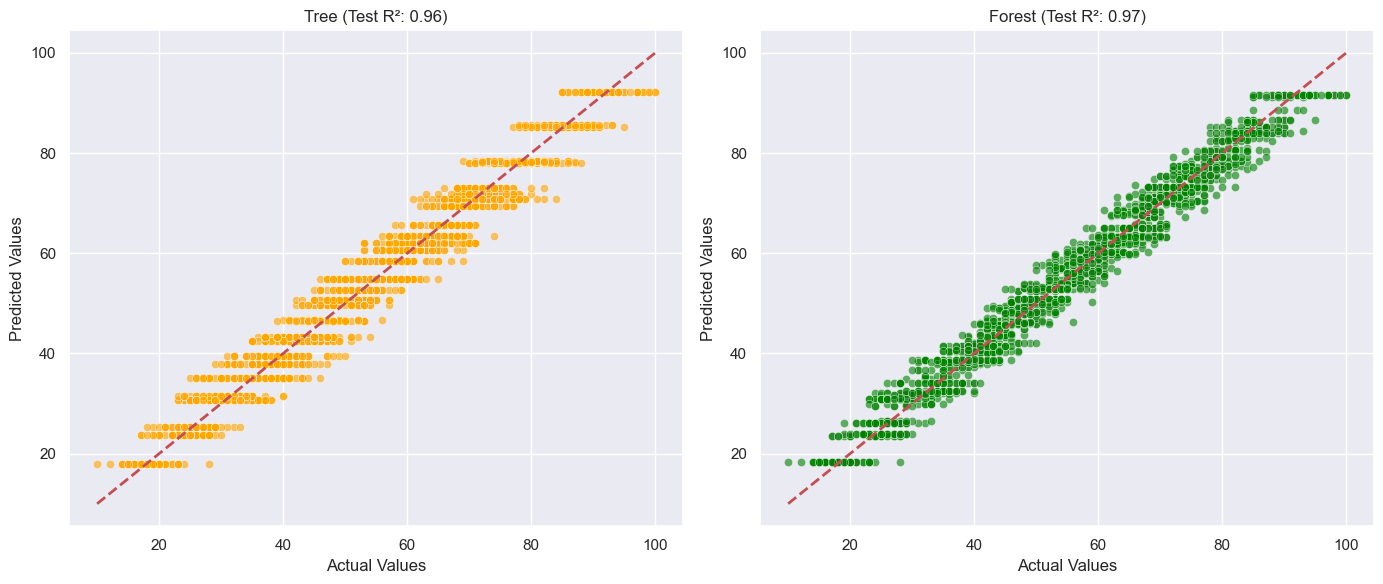

In [7]:
from src.regression_tree import RegressionTree
from src.random_forest import RandomForest
from src.utils import evaluate_model, add_runtime, print_runtimes
from src.utils import print_results
import matplotlib.pyplot as plt
import seaborn as sns
import time

# 1. EVALUATE REGRESSION TREE
# (Assuming your class uses 'min_samples_split' and 'max_depth')

start_training_rt = time.time()
tree_model = RegressionTree(min_samples_split=10, max_depth=5)
duration_training_rt = time.time() - start_training_rt
add_runtime("Training Regression Tree Student",duration_training_rt)

start_evaluation_rt = time.time()
tree_results = evaluate_model(tree_model, X_train, y_train, X_test, y_test)
duration_evaluation_rt = time.time() - start_evaluation_rt
add_runtime("Evaluation Regression Tree Student",duration_evaluation_rt)

print_results("REGRESSION TREE", tree_results)

# 2. EVALUATE RANDOM FOREST
# (Note: Using 'seed' as per your previous message)

start_training_rf = time.time()
rf_model = RandomForest(n_trees=20, max_depth=5, seed=123)
duration_training_rf= time.time() - start_training_rf
add_runtime("Training Random Forest Student",duration_training_rf)

start_evaluation_rf = time.time()
rf_results = evaluate_model(rf_model, X_train, y_train, X_test, y_test)
duration_evaluation_rf = time.time() - start_evaluation_rf
add_runtime("Evaluation Random Forest Student",duration_evaluation_rf)

print_results("RANDOM FOREST", rf_results)
print_runtimes()

# 3. VISUAL COMPARISON
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Tree Results
sns.scatterplot(x=tree_results['y_test_actual'], y=tree_results['y_test_pred'], ax=axes[0], color='orange', alpha=0.6)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_title(f"Tree (Test R²: {tree_results['Test_R2']:.2f})")
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")

# Plot Forest Results
sns.scatterplot(x=rf_results['y_test_actual'], y=rf_results['y_test_pred'], ax=axes[1], color='green', alpha=0.6)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_title(f"Forest (Test R²: {rf_results['Test_R2']:.2f})")
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")

plt.tight_layout()
plt.show()

## Comparison to Existing Implementations

We use the the default parameters for the existing techniques. Hence, the regression tree uses parameters `criterion='squared_error'` and `min_samples_split=2` and the random forest `criterion='squared_error'` and `n_estimators=100`.

The performance metrics for comparision are MSE/RMSE and $R^2$.

--- REGRESSION TREE existing ---
  CV MSE (Error):    9.2715
  CV R² (Stability):    0.9749
  Test MSE (Error):     9.4362
  Test RMSE (Error):    3.0718
  Test R² (Accuracy):   0.9741
------------------------------
--- RANDOM FOREST existing ---
  CV MSE (Error):    5.3437
  CV R² (Stability):    0.9856
  Test MSE (Error):     5.9153
  Test RMSE (Error):    2.4321
  Test R² (Accuracy):   0.9838
------------------------------


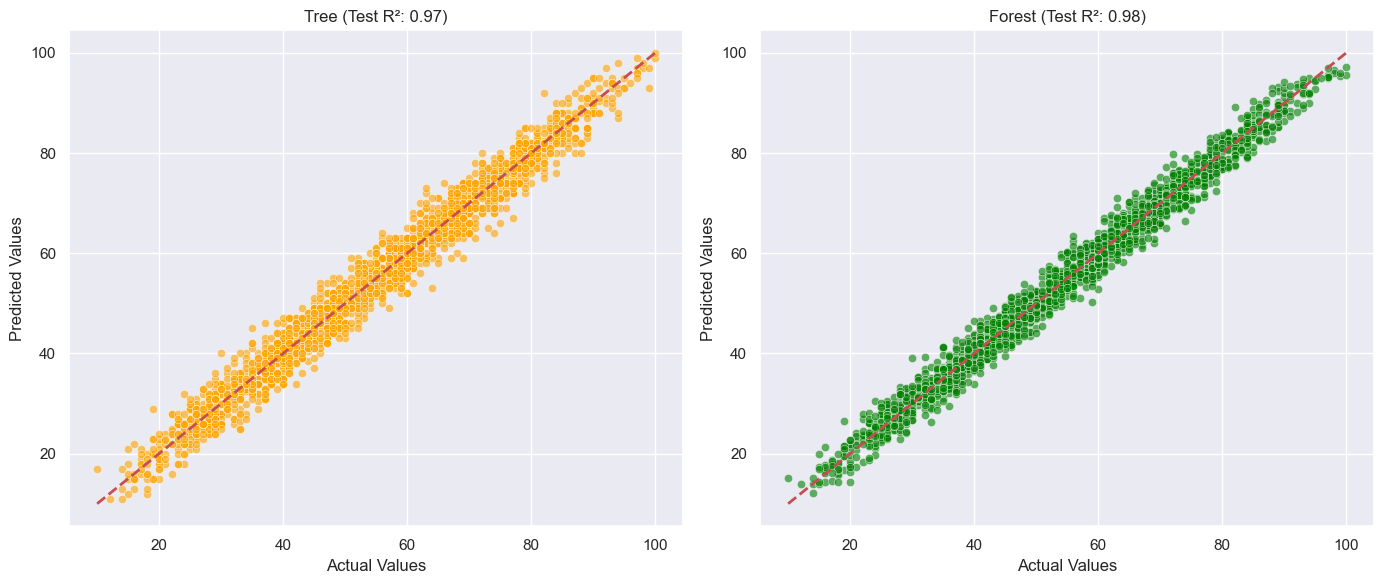

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# EXISTING IMPLENTATIONS
# 1. EVALUATE REGRESSION TREE
tree_model_exist = DecisionTreeRegressor(random_state=123)
tree_results_exist = evaluate_model(tree_model_exist, X_train, y_train, X_test, y_test)
print_results("REGRESSION TREE existing", tree_results_exist)

# 2. EVALUATE RANDOM FOREST
# (Note: Using 'seed' as per your previous message)
rf_model_exist = RandomForestRegressor(random_state=123)
rf_results_exist = evaluate_model(rf_model_exist, X_train, y_train, X_test, y_test)
print_results("RANDOM FOREST existing", rf_results_exist)

# 3. VISUAL COMPARISON
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Tree Results
sns.scatterplot(x=tree_results_exist['y_test_actual'], y=tree_results_exist['y_test_pred'], ax=axes[0], color='orange', alpha=0.6)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_title(f"Tree (Test R²: {tree_results_exist['Test_R2']:.2f})")
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")

# Plot Forest Results
sns.scatterplot(x=rf_results_exist['y_test_actual'], y=rf_results_exist['y_test_pred'], ax=axes[1], color='green', alpha=0.6)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_title(f"Forest (Test R²: {rf_results_exist['Test_R2']:.2f})")
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")

plt.tight_layout()
plt.show()